# Clustering
The dating profiles

### Importing Libraries and Data

In [60]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

In [61]:
# Loading in the cleaned DF
with open("pkl_files/userProfile.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5,3,4,1,3,6,7
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7,9,5,1,9,4,0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1,2,6,5,6,5,4
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5,2,7,8,2,6,6
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6,6,6,4,3,6,3
5,Pop culture junkie. Tv buff. Reader. Friendly travel expert. Incurable twitteraholic. Social media ninja. Coffee enthusiast. Internet specialist.,0,5,7,5,9,2,0
6,Typical thinker. Amateur explorer. Reader. Extreme student. Tv fanatic. Social media ninja.,5,4,7,5,0,8,4
7,Zombie maven. Travel geek. Professional social media buff. Avid pop culture lover.,9,8,8,2,0,0,5
8,Lifelong introvert. General travel maven. Hipster-friendly web trailblazer. Writer. Alcohol fan. Student. Communicator. Coffee guru.,8,8,2,6,1,2,9
9,Travel ninja. Amateur pop culture evangelist. Web fanatic. Freelance communicator. Zombie geek.,9,0,2,2,5,6,8


## Scaling the Categories

In [62]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333
5,Pop culture junkie. Tv buff. Reader. Friendly travel expert. Incurable twitteraholic. Social media ninja. Coffee enthusiast. Internet specialist.,0.000000,0.555556,0.777778,0.555556,1.000000,0.222222,0.000000
6,Typical thinker. Amateur explorer. Reader. Extreme student. Tv fanatic. Social media ninja.,0.555556,0.444444,0.777778,0.555556,0.000000,0.888889,0.444444
7,Zombie maven. Travel geek. Professional social media buff. Avid pop culture lover.,1.000000,0.888889,0.888889,0.222222,0.000000,0.000000,0.555556
8,Lifelong introvert. General travel maven. Hipster-friendly web trailblazer. Writer. Alcohol fan. Student. Communicator. Coffee guru.,0.888889,0.888889,0.222222,0.666667,0.111111,0.222222,1.000000
9,Travel ninja. Amateur pop culture evangelist. Web fanatic. Freelance communicator. Zombie geek.,1.000000,0.000000,0.222222,0.222222,0.555556,0.666667,0.888889


## Vectorizing the Bios

In [63]:
# Instantiating the Vectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [64]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

C:\Users\Nick Georgiou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,advocate,aficionado,alcohol,amateur,analyst,avid,award,bacon,beer,boxing,...,type,typical,unable,unapologetic,wannabe,web,winning,with,writer,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [65]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
new_df

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,type,typical,unable,unapologetic,wannabe,web,winning,with,writer,zombie
0,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.000000,0.555556,0.777778,0.555556,1.000000,0.222222,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.555556,0.444444,0.777778,0.555556,0.000000,0.888889,0.444444,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1.000000,0.888889,0.888889,0.222222,0.000000,0.000000,0.555556,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0.888889,0.888889,0.222222,0.666667,0.111111,0.222222,1.000000,0,0,1,...,0,0,0,0,0,1,0,0,1,0
9,1.000000,0.000000,0.222222,0.222222,0.555556,0.666667,0.888889,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Performing PCA on the DF
Reducing the dimensionality of the dataset with Principal Component Analysis

ValueError: x and y must have same first dimension, but have shapes (92,) and (31,)

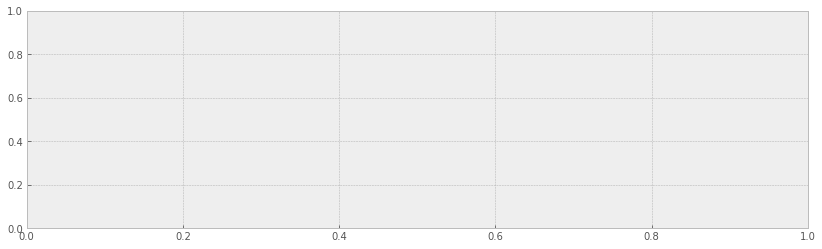

In [66]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [ ]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

## Hierarchical Agglomerative Clustering

### Finding the Optimum Number of Clusters

In [ ]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

### Plotting the Evaluation Scores for Different Evaluation Metrics

In [ ]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Calinski-Harabasz
A higher scores means better defined clusters.  Aiming for a high score

In [ ]:
plot_evaluation(ch_scores)

### Silhouette Coefficient
A higher score means better defined clusters. Aim for high score.

In [ ]:
plot_evaluation(s_scores)

### Davies-Bouldin
A lower score is better.  Scores closer to zero are better.

In [ ]:
plot_evaluation(db_scores)

Based on two evaluation metrics, the best amount of clusters for this dataset is 12.

## Running the Final Clustering Algorithm

In [ ]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=12)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

In [ ]:
# Unscaling the categories then replacing the scaled values
df = df[['Bios']].join(pd.DataFrame(scaler.inverse_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

In [ ]:
# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

### Exporting the Clustered Profiles

In [ ]:
with open("../clustered_profiles.pkl", "wb") as fp:
    pickle.dump(df, fp)

## Finding Users within their own Clusters
Sorting users so they match or are recommended to other similar users.

Example will be randomly using any of the clusters:

In [ ]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

print("For Cluster Group #", rand_cluster)

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)

# Viewing the newly created DF
group

### Vectorizing the Bios only in the Selected Cluster

In [ ]:
# Fitting the vectorizer to the Bios
cluster_x = vectorizer.fit_transform(group['Bios'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names())
cluster_v

In [ ]:
# Joining the vector DF and the original DF
group = group.join(cluster_v)

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
group

### Finding Correlation among the Users

In [ ]:
# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()

corr_group

## Finding the Top 10 Similar users
For a random dating profile

In [ ]:
random_user = random.choice(corr_group.index)

print("Top 10 most similar users to User #", random_user, '\n')

top_10_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:11]

print(top_10_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_10_sim.index[0])